# Final Project_NYPD_Arrest

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)

In [2]:
df = pd.read_csv("NYPD_Arrests_Data__Historic_.csv")

dataset resource https://data.cityofnewyork.us/Public-Safety/NYPD-Arrests-Data-Historic-/8h9b-rp9u
List of every arrest in NYC going back to 2006 through the end of the previous calendar year. This is a breakdown of every arrest effected in NYC by the NYPD going back to 2006 through the end of the previous calendar year. This data is manually extracted every quarter and reviewed by the Office of Management Analysis and Planning before being posted on the NYPD website. Each record represents an arrest effected in NYC by the NYPD and includes information about the type of crime, the location and time of enforcement.
In addition, information related to suspect demographics is also included.
This data can be used by the public to explore the nature of police enforcement activity.
Please refer to the attached data footnotes for additional information about this dataset.

In [3]:
df

ARREST_KEY ARREST_DATE  PD_CD                             PD_DESC  \
0         236791704  11/22/2021  581.0                                 NaN   
1         237354740  12/04/2021  153.0                              RAPE 3   
2         236081433  11/09/2021  681.0          CHILD, ENDANGERING WELFARE   
3          32311380  06/18/2007  511.0  CONTROLLED SUBSTANCE, POSSESSION 7   
4         192799737  01/26/2019  177.0                        SEXUAL ABUSE   
...             ...         ...    ...                                 ...   
5498645   255851599  12/13/2022  969.0      TRAFFIC,UNCLASSIFIED INFRACTIO   
5498646   256469262  12/16/2022  198.0                 CRIMINAL CONTEMPT 1   
5498647   260305039  12/20/2022  548.0        GAMBLING, DEVICE, POSSESSION   
5498648   255843041  12/13/2022  101.0                           ASSAULT 3   
5498649   261085179  12/29/2022  339.0      LARCENY,PETIT FROM OPEN AREAS,   

         KY_CD                     OFNS_DESC    LAW_CODE LAW_CAT_CD  \
0          NaN                           NaN  PL 2225001          M   
1        104.0                          RAPE  PL 1302502          F   
2        233.0                    SEX CRIMES  PL 2601001          M   
3        235.0               DANGEROUS DRUGS  PL 2200300          M   
4        116.0                    SEX CRIMES  PL 1306503          F   
...        ...                           ...         ...        ...   
5498645  881.0      OTHER TRAFFIC INFRACTION  VTL051101A          M   
5498646  126.0       MISCELLANEOUS PENAL LAW  PL 21551B3          F   
5498647  350.0                      GAMBLING  PL 2253001          M   
5498648  344.0  ASSAULT 3 & RELATED OFFENSES  PL 1200001          M   
5498649  341.0                 PETIT LARCENY  PL 1552500          M   

        ARREST_BORO  ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP PERP_SEX  \
0                 M               28                0.0     45-64        M   
1                 B               41                0.0     25-44        M   
2                 Q              113                0.0     25-44        M   
3                 Q               27                1.0     18-24        M   
4                 M               25                0.0     45-64        M   
...             ...              ...                ...       ...      ...   
5498645           M               32                0.0     25-44        M   
5498646           B               46                0.0     25-44        M   
5498647           K               72                0.0     25-44        F   
5498648           M                5                0.0     45-64        M   
5498649           B               40                0.0     25-44        F   

                        PERP_RACE  X_COORD_CD  Y_COORD_CD   Latitude  \
0                           BLACK    997427.0    230378.0  40.799009   
1                  WHITE HISPANIC   1013232.0    236725.0  40.816392   
2                           BLACK   1046367.0    186986.0  40.679700   
3                           BLACK         NaN         NaN        NaN   
4                           BLACK   1000555.0    230994.0  40.800694   
...                           ...         ...         ...        ...   
5498645                     BLACK   1000188.0    238820.0  40.822167   
5498646                     BLACK   1011750.0    250274.0  40.853578   
5498647  ASIAN / PACIFIC ISLANDER    981944.0    171869.0  40.638420   
5498648  ASIAN / PACIFIC ISLANDER    986159.0    200104.0  40.715917   
5498649                     BLACK   1006718.0    233117.0  40.806500   

         Longitude                                        Lon_Lat  
0       -73.952409  POINT (-73.95240854099995 40.799008797000056)  
1       -73.895296  POINT (-73.89529641399997 40.816391847000034)  
2       -73.776047   POINT (-73.77604736799998 40.67970040800003)  
3              NaN                                            NaN  
4       -73.941109  POINT (-73.94110928599997 40.800694331000045)  
...      

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5498650 entries, 0 to 5498649
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ARREST_KEY   int64  
 1   ARREST_DATE  object 
 2   PD_DESC      object 
 3   OFNS_DESC    object 
 4   LAW_CAT_CD   object 
 5   ARREST_BORO  object 
 6   AGE_GROUP    object 
 7   PERP_SEX     object 
 8   PERP_RACE    object 
 9   Latitude     float64
 10  Longitude    float64
 11  Lon_Lat      object 
dtypes: float64(2), int64(1), object(9)
memory usage: 503.4+ MB


In [3]:
df = df.drop(["PD_DESC",'PD_CD', 'KY_CD', 'LAW_CODE','ARREST_PRECINCT','JURISDICTION_CODE', 'X_COORD_CD',"Y_COORD_CD"], axis=1)


In [4]:
df

ARREST_KEY ARREST_DATE                     OFNS_DESC LAW_CAT_CD  \
0         236791704  11/22/2021                           NaN          M   
1         237354740  12/04/2021                          RAPE          F   
2         236081433  11/09/2021                    SEX CRIMES          M   
3          32311380  06/18/2007               DANGEROUS DRUGS          M   
4         192799737  01/26/2019                    SEX CRIMES          F   
...             ...         ...                           ...        ...   
5498645   255851599  12/13/2022      OTHER TRAFFIC INFRACTION          M   
5498646   256469262  12/16/2022       MISCELLANEOUS PENAL LAW          F   
5498647   260305039  12/20/2022                      GAMBLING          M   
5498648   255843041  12/13/2022  ASSAULT 3 & RELATED OFFENSES          M   
5498649   261085179  12/29/2022                 PETIT LARCENY          M   

        ARREST_BORO AGE_GROUP PERP_SEX                 PERP_RACE   Latitude  \
0                 M     45-64        M                     BLACK  40.799009   
1                 B     25-44        M            WHITE HISPANIC  40.816392   
2                 Q     25-44        M                     BLACK  40.679700   
3                 Q     18-24        M                     BLACK        NaN   
4                 M     45-64        M                     BLACK  40.800694   
...             ...       ...      ...                       ...        ...   
5498645           M     25-44        M                     BLACK  40.822167   
5498646           B     25-44        M                     BLACK  40.853578   
5498647           K     25-44        F  ASIAN / PACIFIC ISLANDER  40.638420   
5498648           M     45-64        M  ASIAN / PACIFIC ISLANDER  40.715917   
5498649           B     25-44        F                     BLACK  40.806500   

         Longitude                                        Lon_Lat  
0       -73.952409  POINT (-73.95240854099995 40.799008797000056)  
1       -73.895296  POINT (-73.89529641399997 40.816391847000034)  
2       -73.776047   POINT (-73.77604736799998 40.67970040800003)  
3              NaN                                            NaN  
4       -73.941109  POINT (-73.94110928599997 40.800694331000045)  
...            ...                                            ...  
5498645 -73.942415               POINT (-73.94241483 40.82216691)  
5498646 -73.900591                   POINT (-73.900591 40.853578)  
5498647 -74.008307                    POINT (-74.008307 40.63842)  
5498648 -73.993111                   POINT (-73.993111 40.715917)  
5498649 -73.918838                     POINT (-73.918838 40.8065)  

[5498650 rows x 11 columns]

In [123]:
df["OFNS_DESC"].describe()

count             5488911
unique                 89
top       DANGEROUS DRUGS
freq              1109839
Name: OFNS_DESC, dtype: object

### What happened in each date?

In [125]:
df["ARREST_DATE"].describe()

count        5498080
unique          6209
top       01/20/2010
freq            1773
Name: ARREST_DATE, dtype: object

In [126]:
df["ARREST_DATE"].value_counts().head(10)

01/20/2010    1773
05/13/2009    1772
03/07/2012    1750
02/11/2009    1738
02/01/2012    1726
05/20/2010    1725
02/12/2009    1707
01/14/2009    1701
03/05/2010    1700
01/22/2010    1694
Name: ARREST_DATE, dtype: int64

Be careful in Jan, Feb, Mar, and May.

In [133]:
df["ARREST_DATE"].value_counts().min()

91

In [134]:
df["ARREST_DATE"].value_counts().mean()

885.5016910935739

<Axes: ylabel='Frequency'>

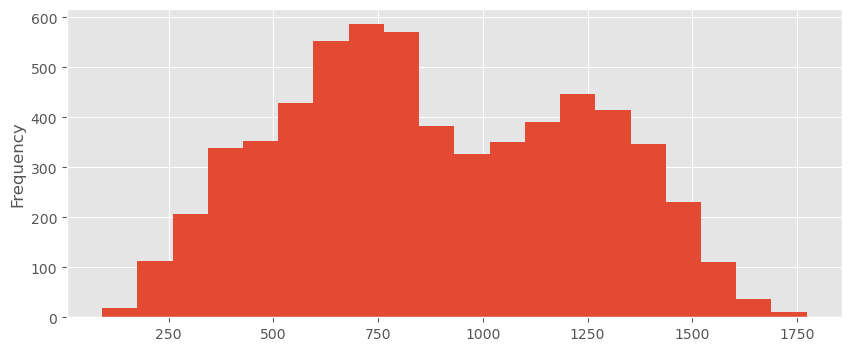

In [151]:
df["ARREST_DATE"].value_counts().plot(kind="hist", bins=20)

### Gender Differences

<Axes: ylabel='PERP_SEX'>

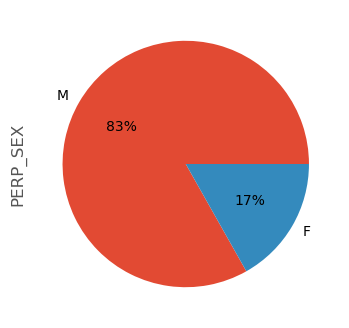

In [121]:
df['PERP_SEX'].value_counts().plot(kind="pie",autopct='%1.0f%%' )

In [159]:
df[df['PERP_SEX']=="M"]["OFNS_DESC"]. value_counts()

DANGEROUS DRUGS                           958290
ASSAULT 3 & RELATED OFFENSES              426569
OTHER OFFENSES RELATED TO THEFT           267735
OTHER STATE LAWS                          225078
DANGEROUS WEAPONS                         196718
                                           ...  
NYS LAWS-UNCLASSIFIED VIOLATION                2
UNLAWFUL POSS. WEAP. ON SCHOOL                 2
KIDNAPPING AND RELATED OFFENSES                2
LOITERING,BEGGING                              1
OFFENSES AGAINST MARRIAGE UNCLASSIFIED         1
Name: OFNS_DESC, Length: 89, dtype: int64

<Axes: ylabel='OFNS_DESC'>

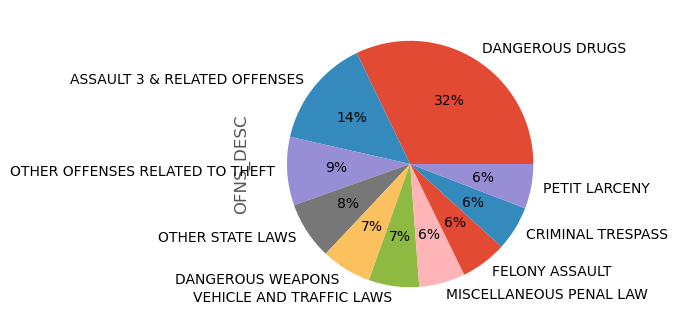

In [161]:
df[df['PERP_SEX']=="M"]["OFNS_DESC"]. value_counts().head(10).plot(kind="pie",autopct='%1.0f%%')

In [162]:
df[df['PERP_SEX']=="F"]["OFNS_DESC"]. describe()

count              923890
unique                 82
top       DANGEROUS DRUGS
freq               151549
Name: OFNS_DESC, dtype: object

<Axes: ylabel='OFNS_DESC'>

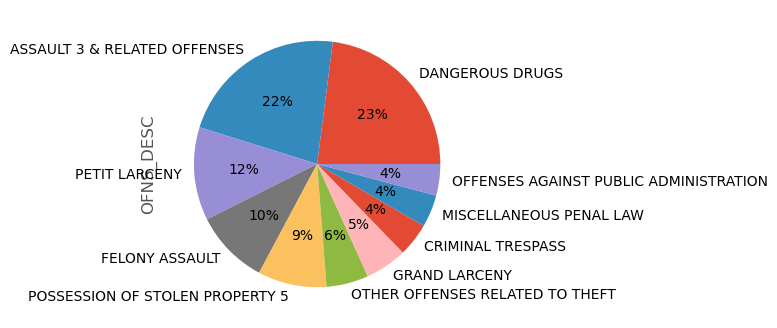

In [163]:
df[df['PERP_SEX']=="F"]["OFNS_DESC"]. value_counts().head(10).plot(kind="pie",autopct='%1.0f%%')

### Arrest_Race Percentage

In [20]:
df['PERP_RACE'].value_counts()

BLACK                             2673976
WHITE HISPANIC                    1423743
WHITE                              657104
BLACK HISPANIC                     446257
ASIAN / PACIFIC ISLANDER           231544
UNKNOWN                             52275
AMERICAN INDIAN/ALASKAN NATIVE      12388
OTHER                                1363
Name: PERP_RACE, dtype: int64

<Axes: ylabel='PERP_RACE'>

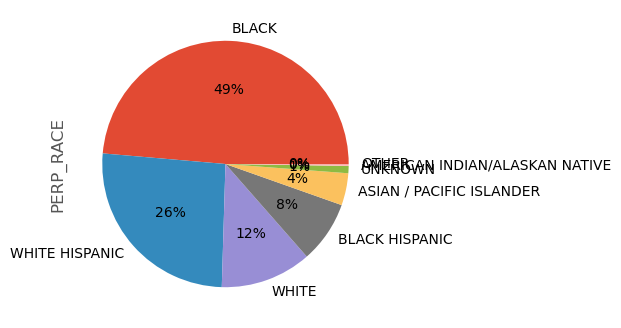

In [18]:
df['PERP_RACE'].value_counts().plot(kind="pie",autopct='%1.0f%%' )

### Analyze these cases by age groups...

In [22]:
df['AGE_GROUP'].describe()

count     5498633
unique         91
top         25-44
freq      2591894
Name: AGE_GROUP, dtype: object

In [39]:
df["AGE_GROUP"].value_counts().head(5)

25-44    2591894
18-24    1408371
45-64    1019499
<18       429726
65+        48965
Name: AGE_GROUP, dtype: int64

<Axes: ylabel='AGE_GROUP'>

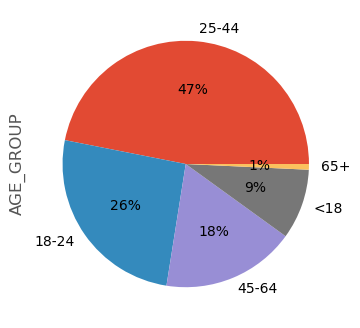

In [173]:
df[df['PERP_SEX']=="F"]["AGE_GROUP"]. value_counts().head(5).plot(kind="pie",autopct='%1.0f%%')

<Axes: ylabel='AGE_GROUP'>

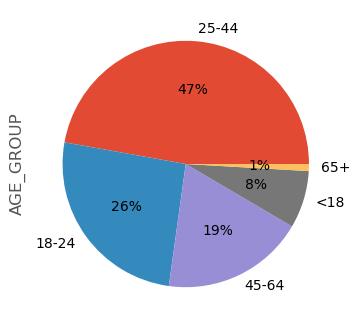

In [175]:
df[df['PERP_SEX']=="M"]["AGE_GROUP"]. value_counts().head(5).plot(kind="pie",autopct='%1.0f%%')

very similar distribution on age groups by compairing cases with the genders

#### The reasons of arrests happened in each age group

In [164]:
df=df[~df.isin(["(null)"]).any(axis=1)]

In [165]:
df[df["AGE_GROUP"]=="25-44"].sort_values(by=["OFNS_DESC"])

ARREST_KEY ARREST_DATE OFNS_DESC LAW_CAT_CD ARREST_BORO AGE_GROUP  \
2373723    93540700  11/12/2013  ABORTION          F           M     25-44   
1049209   171560375  11/14/2017  ABORTION          F           Q     25-44   
608293    184587703  06/29/2018  ABORTION          F           K     25-44   
696728    182478206  05/08/2018  ABORTION          F           B     25-44   
1648015   148645245  12/17/2015  ABORTION          F           B     25-44   
...             ...         ...       ...        ...         ...       ...   
5258732    24660753  10/06/2006       NaN          M           M     25-44   
5259290    24998775  10/27/2006       NaN        NaN           M     25-44   
5270211    24627288  10/04/2006       NaN        NaN           M     25-44   
5274807    24500685  09/26/2006       NaN        NaN           M     25-44   
5301905    24028439  08/25/2006       NaN        NaN           M     25-44   

        PERP_SEX       PERP_RACE   Latitude  Longitude  \
2373723        M           BLACK  40.796058 -73.967052   
1049209        M           BLACK  40.769561 -73.915363   
608293         M           BLACK  40.697483 -73.940934   
696728         M  WHITE HISPANIC  40.825472 -73.892941   
1648015        M  WHITE HISPANIC  40.810398 -73.924895   
...          ...             ...        ...        ...   
5258732        M           BLACK  40.707322 -74.010966   
5259290        M           BLACK  40.753939 -73.994844   
5270211        M           BLACK  40.762897 -73.987526   
5274807        M  BLACK HISPANIC  40.791998 -73.949719   
5301905        M           BLACK  40.753939 -73.994844   

                                               Lon_Lat  
2373723   POINT (-73.96705230699997 40.79605784000006)  
1049209   POINT (-73.91536344699995 40.76956124200007)  
608293    POINT (-73.94093358199996 40.69748345100004)  
696728    POINT (-73.89294073699995 40.82547196300004)  
1648015  POINT (-73.92489531099994 40.810398494000026)  
...                                                ...  
5258732   POINT (-74.01096626599998 40.70732160200004)  
5259290   POINT (-73.99484365499995 40.75393893800003)  
5270211  POINT (-73.98752577899995 40.762897226000064)  
5274807   POINT (-73.94971942099994 40.79199761600006)  
5301905   POINT (-73.99484365499995 40.75393893800003)  

[2591569 rows x 11 columns]

In [83]:
df[df["AGE_GROUP"]=="25-44"]["OFNS_DESC"].value_counts().head(10)

DANGEROUS DRUGS                    495152
ASSAULT 3 & RELATED OFFENSES       291513
VEHICLE AND TRAFFIC LAWS           131197
FELONY ASSAULT                     121760
OTHER STATE LAWS                   117590
PETIT LARCENY                      115767
MISCELLANEOUS PENAL LAW            111383
OTHER OFFENSES RELATED TO THEFT    110856
OTHER TRAFFIC INFRACTION           108443
DANGEROUS WEAPONS                   89520
Name: OFNS_DESC, dtype: int64

<Axes: >

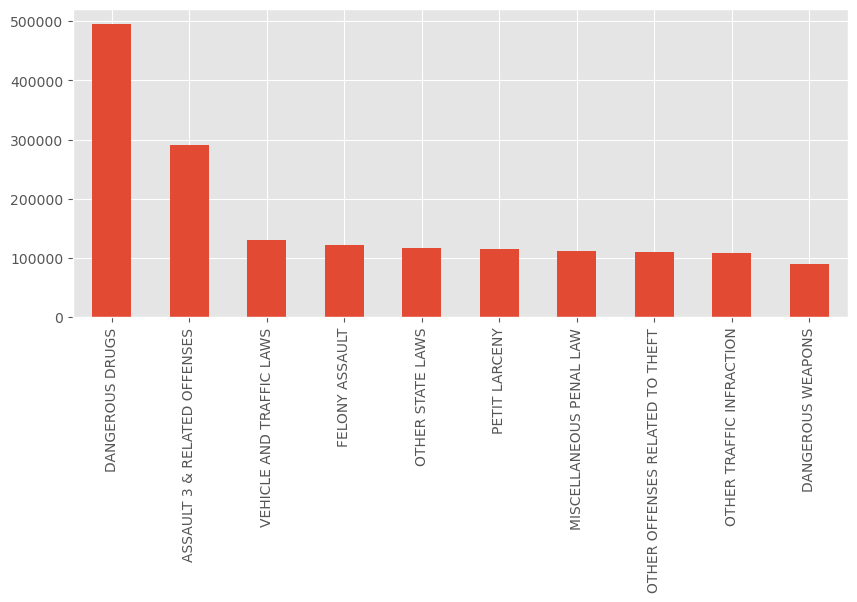

In [82]:
df[df["AGE_GROUP"]=="25-44"]["OFNS_DESC"].value_counts().head(10).plot(kind="bar")

In [96]:
df[df["AGE_GROUP"]=="18-24"]["OFNS_DESC"].value_counts().head(10)

DANGEROUS DRUGS                           308715
ASSAULT 3 & RELATED OFFENSES              130321
OTHER OFFENSES RELATED TO THEFT           113909
DANGEROUS WEAPONS                          74678
FELONY ASSAULT                             58858
CRIMINAL TRESPASS                          58837
OTHER STATE LAWS                           58212
ROBBERY                                    55362
OFFENSES AGAINST PUBLIC ADMINISTRATION     48601
MISCELLANEOUS PENAL LAW                    47771
Name: OFNS_DESC, dtype: int64

<Axes: >

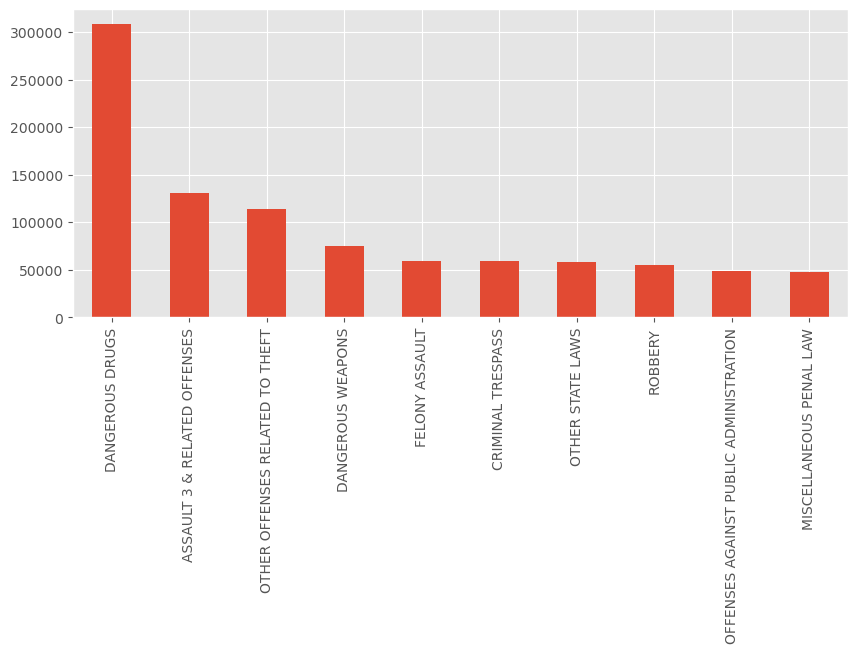

In [109]:
df[df["AGE_GROUP"]=="18-24"]["OFNS_DESC"].value_counts().head(10).plot(kind="bar")

In [97]:
df[df["AGE_GROUP"]=="45-64"]["OFNS_DESC"].value_counts().head(10)

DANGEROUS DRUGS                    236717
ASSAULT 3 & RELATED OFFENSES        95423
PETIT LARCENY                       69442
OTHER STATE LAWS                    57553
OTHER OFFENSES RELATED TO THEFT     45155
VEHICLE AND TRAFFIC LAWS            44341
MISCELLANEOUS PENAL LAW             39357
FELONY ASSAULT                      39306
CRIMINAL TRESPASS                   37589
POSSESSION OF STOLEN PROPERTY 5     32696
Name: OFNS_DESC, dtype: int64

<Axes: >

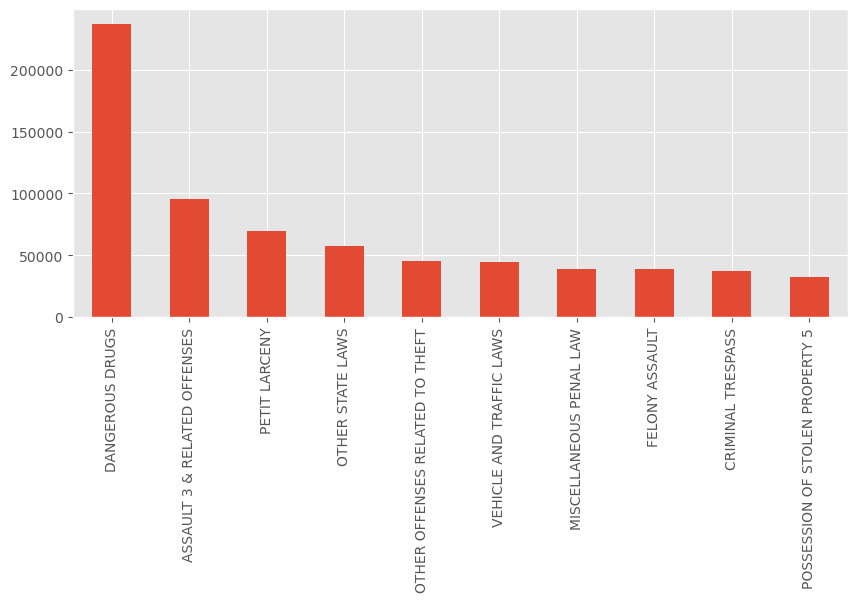

In [111]:
df[df["AGE_GROUP"]=="45-64"]["OFNS_DESC"].value_counts().head(10).plot(kind="bar")

In [99]:
df[df["AGE_GROUP"]=="<18"]["OFNS_DESC"].value_counts().head(10)

DANGEROUS DRUGS                         60400
ROBBERY                                 56552
ASSAULT 3 & RELATED OFFENSES            49409
OTHER OFFENSES RELATED TO THEFT         33577
CRIMINAL MISCHIEF & RELATED OFFENSES    26066
CRIMINAL TRESPASS                       25716
DANGEROUS WEAPONS                       23001
FELONY ASSAULT                          21692
PETIT LARCENY                           20135
POSSESSION OF STOLEN PROPERTY 5         20049
Name: OFNS_DESC, dtype: int64

<Axes: >

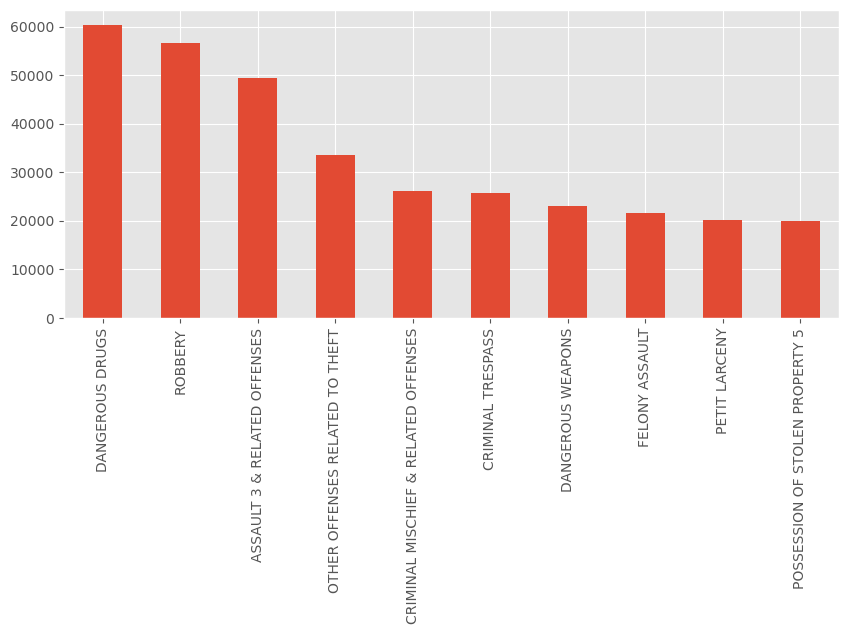

In [114]:
df[df["AGE_GROUP"]=="<18"]["OFNS_DESC"].value_counts().head(10).plot(kind="bar")

In [100]:
df[df["AGE_GROUP"]=="65+"]["OFNS_DESC"].value_counts().head(10)

DANGEROUS DRUGS                     8803
ASSAULT 3 & RELATED OFFENSES        6461
PETIT LARCENY                       3506
FELONY ASSAULT                      3083
VEHICLE AND TRAFFIC LAWS            2539
MISCELLANEOUS PENAL LAW             2068
OTHER STATE LAWS                    1828
OTHER STATE LAWS (NON PENAL LAW)    1767
INTOXICATED & IMPAIRED DRIVING      1397
DANGEROUS WEAPONS                   1373
Name: OFNS_DESC, dtype: int64

<Axes: >

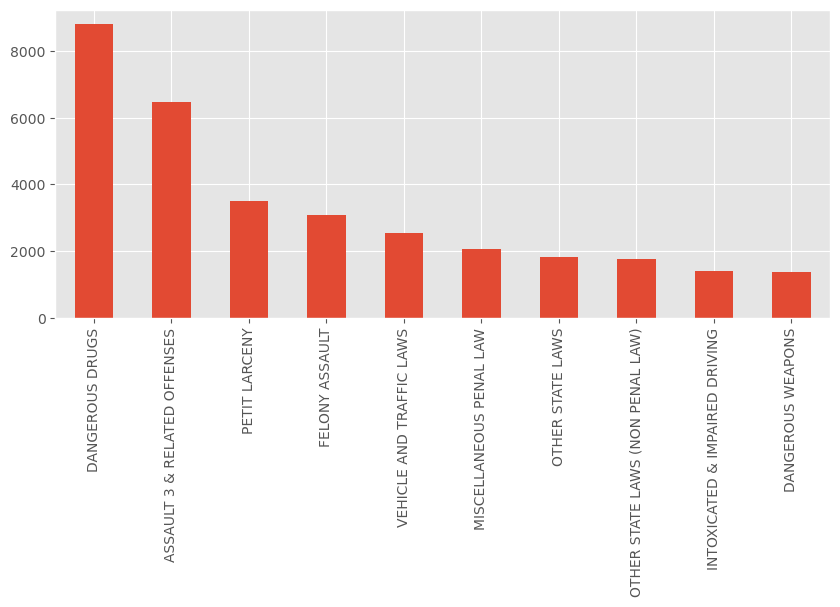

In [115]:
df[df["AGE_GROUP"]=="65+"]["OFNS_DESC"].value_counts().head(10).plot(kind="bar")

#### Dangerous Drugs is the most frequent reason of arrests in every age group

### Analyze by case description

In [21]:
df['OFNS_DESC'].describe()

count             5489481
unique                 90
top       DANGEROUS DRUGS
freq              1109839
Name: OFNS_DESC, dtype: object

<Axes: >

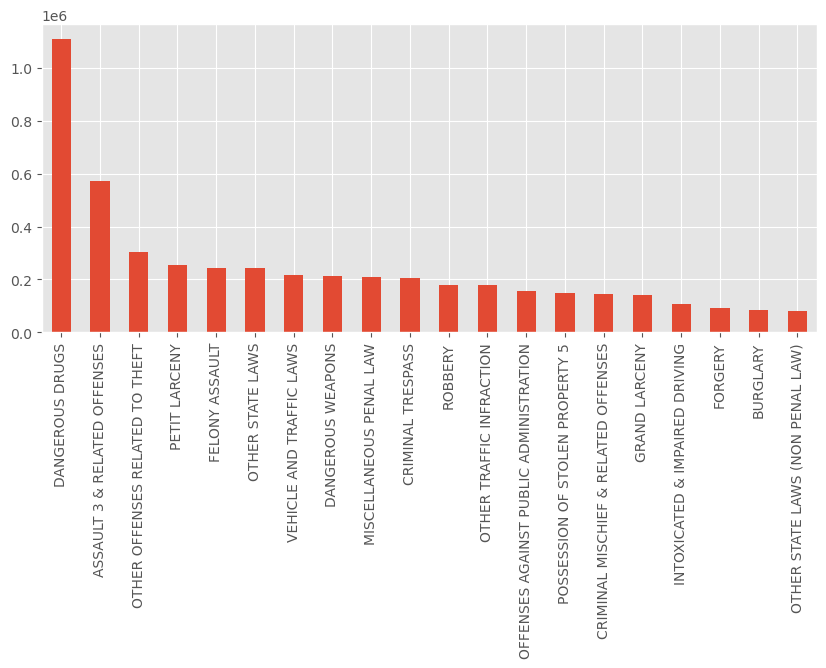

In [27]:
df['OFNS_DESC'].value_counts().head(20).plot(kind='bar')

<Axes: xlabel='Latitude', ylabel='Longitude'>

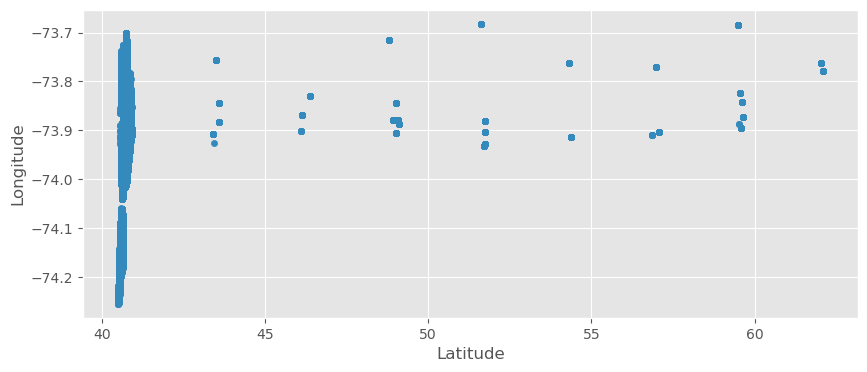

In [185]:
df[df['OFNS_DESC']=="DANGEROUS DRUGS"].plot(kind="scatter",x="Latitude",y="Longitude")

### Time to Look at the map.
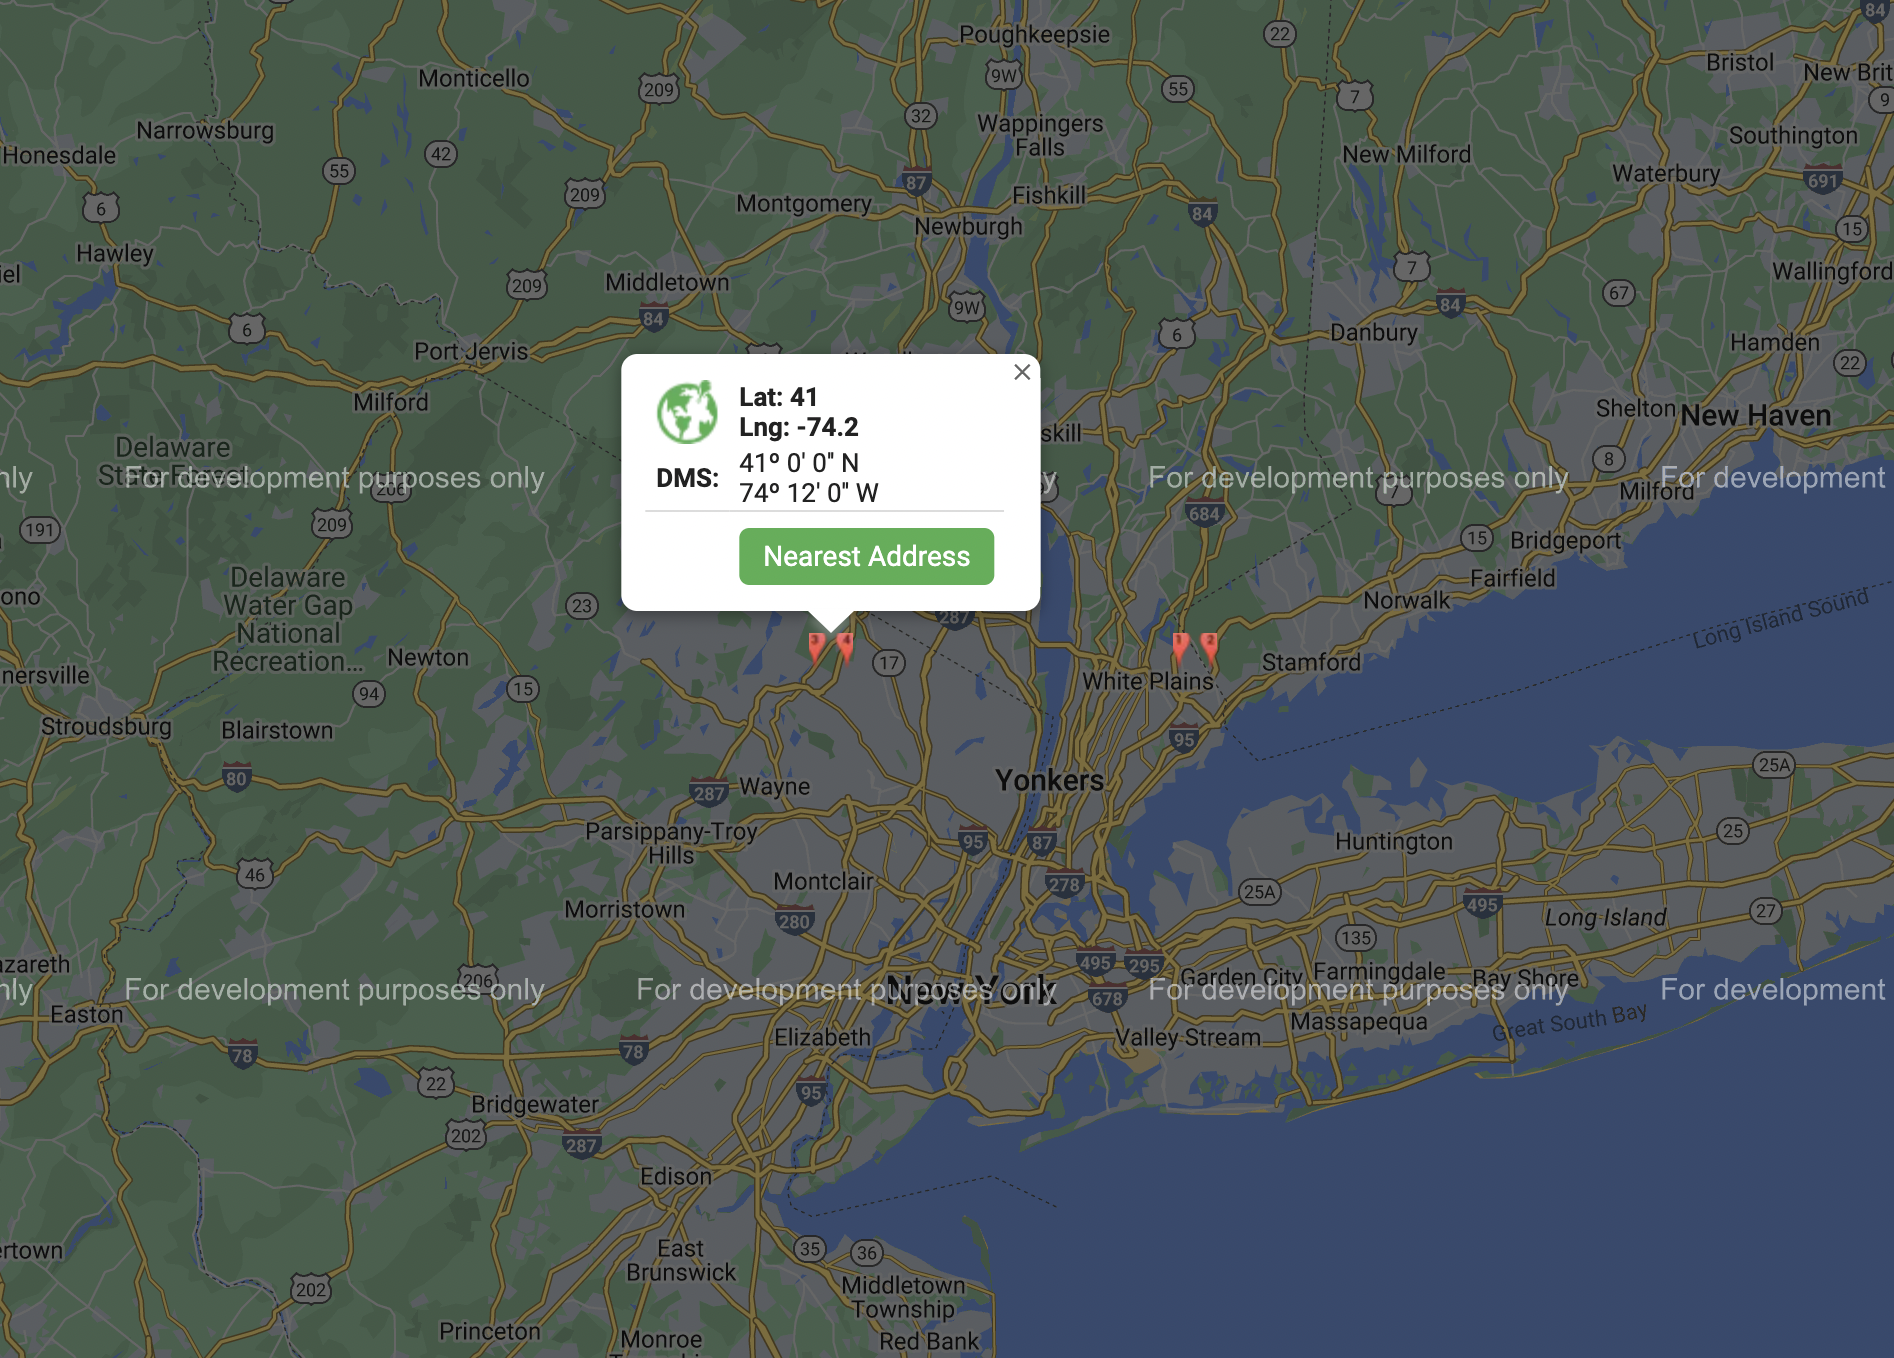
https://latlongdata.com/latitude-longitude-lookup/

In [108]:
df[df['OFNS_DESC']=="DANGEROUS DRUGS"]["AGE_GROUP"].value_counts().head(5)

25-44    495152
18-24    308715
45-64    236717
<18       60400
65+        8803
Name: AGE_GROUP, dtype: int64

<Axes: ylabel='AGE_GROUP'>

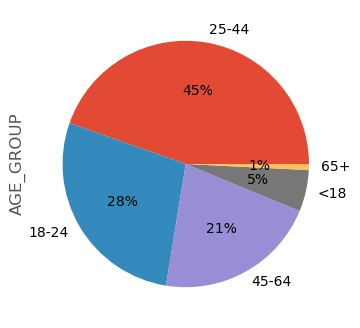

In [118]:
df[df['OFNS_DESC']=="DANGEROUS DRUGS"]["AGE_GROUP"].value_counts().head(5).plot(kind="pie",autopct='%1.0f%%')

<Axes: ylabel='AGE_GROUP'>

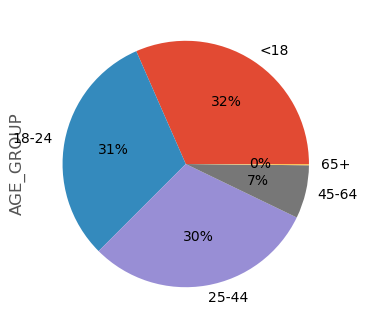

In [119]:
df[df['OFNS_DESC']=="ROBBERY"]["AGE_GROUP"].value_counts().head(5).plot(kind="pie",autopct='%1.0f%%')

#### younger people prefered robbery a lot

## Where were they arrested?

### Analyze by bourough of arrests

<Axes: ylabel='ARREST_BORO'>

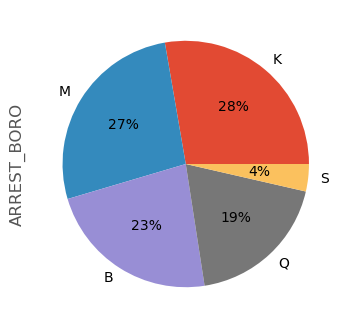

In [19]:
df["ARREST_BORO"].value_counts().plot(kind="pie", autopct='%1.0f%%')

## Busy level for borough of arrest: Brooklyn> Manhattan>Bronx>Queens>Staten Island
### Annual Warning "Hide, Run, or Fight."

In [25]:
dfbk=df[df["ARREST_BORO"]=="K"]

In [9]:
dfm=df[df["ARREST_BORO"]=="M"]

In [10]:
dfb=df[df["ARREST_BORO"]=="B"]

In [11]:
dfq=df[df["ARREST_BORO"]=="Q"]

In [12]:
dfs=df[df["ARREST_BORO"]=="S"]

In [26]:
dfbk

ARREST_KEY ARREST_DATE                      OFNS_DESC LAW_CAT_CD  \
9         149117452  01/06/2016                           RAPE          F   
10        237339209  12/04/2021   ASSAULT 3 & RELATED OFFENSES          M   
13        190049060  11/15/2018                           RAPE          F   
14         24288194  09/13/2006              CRIMINAL TRESPASS          M   
15        221870158  12/15/2020          ANTICIPATORY OFFENSES          M   
...             ...         ...                            ...        ...   
5498631   260540230  12/27/2022  OFF. AGNST PUB ORD SENSBLTY &          M   
5498636   255725440  12/11/2022                DANGEROUS DRUGS          F   
5498637   255550710  12/07/2022       OFFENSES INVOLVING FRAUD          M   
5498639   261152493  12/30/2022   ASSAULT 3 & RELATED OFFENSES          M   
5498647   260305039  12/20/2022                       GAMBLING          M   

        ARREST_BORO AGE_GROUP PERP_SEX                 PERP_RACE   Latitude  \
9                 K     25-44        M                     BLACK  40.648650   
10                K     25-44        M                     BLACK  40.688584   
13                K     25-44        M                     BLACK  40.674583   
14                K     45-64        M                     BLACK  40.671254   
15                K     45-64        F                     BLACK  40.672763   
...             ...       ...      ...                       ...        ...   
5498631           K     25-44        F                     BLACK  40.648859   
5498636           K     25-44        M  ASIAN / PACIFIC ISLANDER  40.637301   
5498637           K     25-44        M                     BLACK  40.670873   
5498639           K     18-24        M                     BLACK  40.671104   
5498647           K     25-44        F  ASIAN / PACIFIC ISLANDER  40.638420   

         Longitude                                        Lon_Lat  
9       -73.950336  POINT (-73.95033556299995 40.648650085000035)  
10      -73.916526  POINT (-73.91652634699994 40.688583516000044)  
13      -73.930222   POINT (-73.93022154099998 40.67458330800008)  
14      -73.926714        POINT (-73.926713851 40.67125445700003)  
15      -73.872043   POINT (-73.87204263699994 40.67276293200007)  
...            ...                                            ...  
5498631 -73.950820                    POINT (-73.95082 40.648859)  
5498636 -74.009474                   POINT (-74.009474 40.637301)  
5498637 -73.907168                   POINT (-73.907168 40.670873)  
5498639 -73.913562                   POINT (-73.913562 40.671104)  
5498647 -74.008307                    POINT (-74.008307 40.63842)  

[1523971 rows x 11 columns]

<Axes: ylabel='OFNS_DESC'>

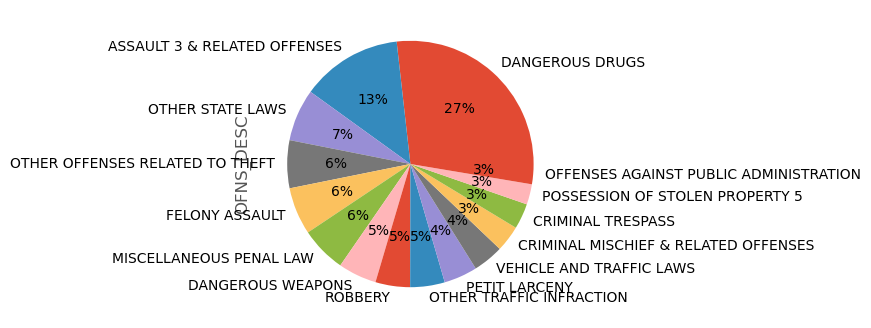

In [195]:
dfbk["OFNS_DESC"].value_counts().head(15).plot(kind="pie", autopct='%1.0f%%')

In [196]:
dfbk["OFNS_DESC"].value_counts().head(15)

DANGEROUS DRUGS                           334028
ASSAULT 3 & RELATED OFFENSES              165389
OTHER STATE LAWS                           85417
OTHER OFFENSES RELATED TO THEFT            78289
FELONY ASSAULT                             77396
MISCELLANEOUS PENAL LAW                    74812
DANGEROUS WEAPONS                          63018
ROBBERY                                    56643
OTHER TRAFFIC INFRACTION                   56500
PETIT LARCENY                              54819
VEHICLE AND TRAFFIC LAWS                   50016
CRIMINAL MISCHIEF & RELATED OFFENSES       42950
CRIMINAL TRESPASS                          41700
POSSESSION OF STOLEN PROPERTY 5            33277
OFFENSES AGAINST PUBLIC ADMINISTRATION     32909
Name: OFNS_DESC, dtype: int64

<Axes: ylabel='OFNS_DESC'>

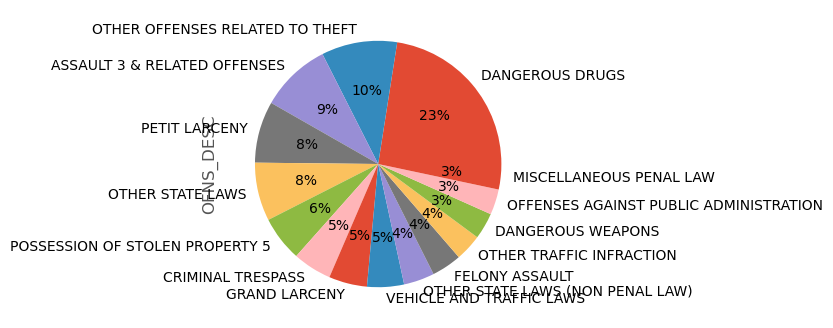

In [13]:
dfm["OFNS_DESC"].value_counts().head(15).plot(kind="pie", autopct='%1.0f%%')

<Axes: ylabel='OFNS_DESC'>

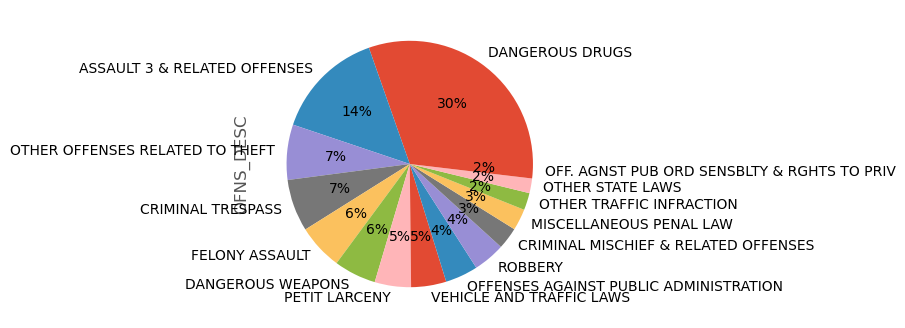

In [14]:
dfb["OFNS_DESC"].value_counts().head(15).plot(kind="pie", autopct='%1.0f%%')

<Axes: ylabel='OFNS_DESC'>

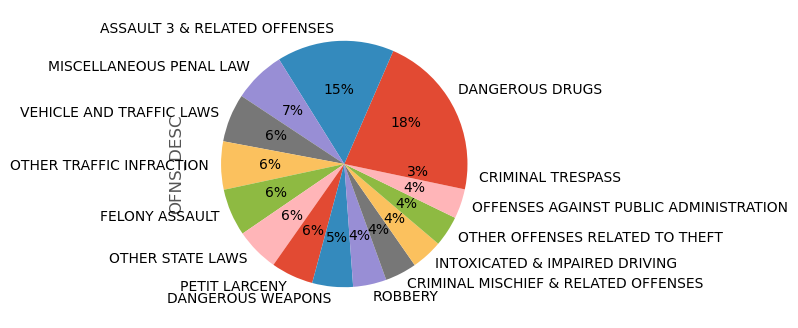

In [15]:
dfq["OFNS_DESC"].value_counts().head(15).plot(kind="pie", autopct='%1.0f%%')

<Axes: ylabel='OFNS_DESC'>

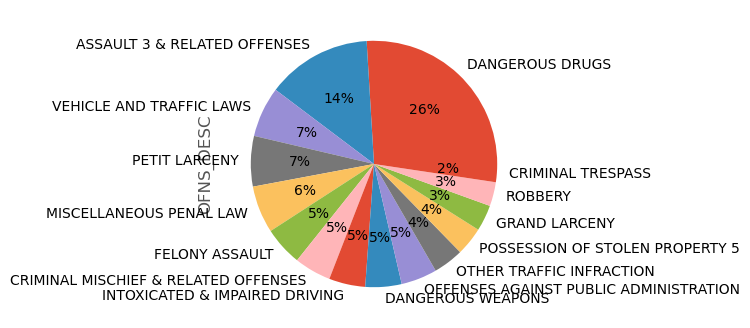

In [16]:
dfs["OFNS_DESC"].value_counts().head(15).plot(kind="pie", autopct='%1.0f%%')

In [5]:
df[df["OFNS_DESC"]=="DANGEROUS WEAPONS"]['ARREST_BORO'].value_counts()

K    63018
B    58318
Q    43137
M    40336
S     7972
Name: ARREST_BORO, dtype: int64

<Axes: ylabel='ARREST_BORO'>

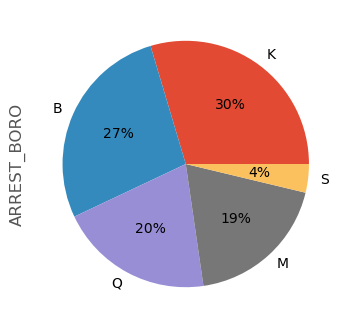

In [8]:
df[df["OFNS_DESC"]=="DANGEROUS WEAPONS"]['ARREST_BORO'].value_counts().plot(kind="pie", autopct='%1.0f%%')

### NO.1 Dangerous--------------- Brooklyn